In [1]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
df=pd.read_csv("hour.csv")

In [4]:
df.shape

(17379, 17)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

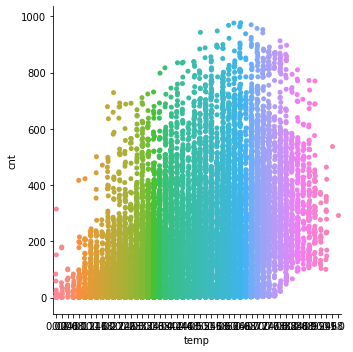

In [7]:
#sns.set(style="ticks", color_codes=True)
sns.catplot(x="temp", y="cnt", data=df);

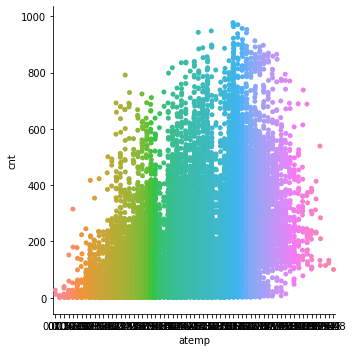

In [9]:
sns.catplot(x="atemp", y="cnt", data=df);

## Linear Regression Application

In [10]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

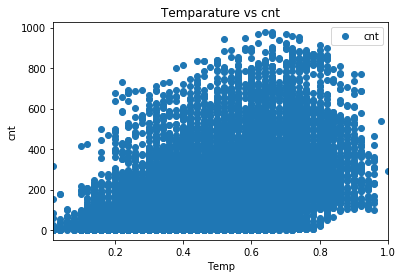

In [12]:
df.plot(x='temp', y='cnt', style='o')  
plt.title('Temparature vs cnt')  
plt.xlabel('Temp')  
plt.ylabel('cnt')  
plt.show()

In [15]:
X=df['temp']
y=df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
fit=lr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

In [16]:
lr.intercept_


array([-0.73670833])

In [17]:
y_test2=y_test.values.reshape(-1,1)
y_test2

array([[  2],
       [279],
       [514],
       ...,
       [114],
       [288],
       [105]], dtype=int64)

In [18]:
y_pred = lr.predict(X_test.values.reshape(-1,1))
print(y_pred)

[[160.51461808]
 [ 83.72827217]
 [283.37277153]
 ...
 [ 99.08554135]
 [306.4086753 ]
 [ 76.04963758]]


In [20]:
from sklearn.metrics import r2_score
print(np.mean((y_pred - y_test2) ** 2))
print(r2_score(y_pred , y_test2) )
print( np.mean(np.absolute(y_pred - y_test2)))

27248.52762888466
-4.127914296998957
125.02821612052074


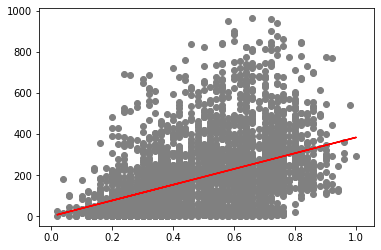

In [21]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red')
plt.show()

## Polynomial Regression

In [41]:
df_2=df.head(500)

In [48]:
for col in df_2.columns: 
    print(col) 

instant
dteday
season
yr
mnth
hr
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [51]:
X=df_2[['instant','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]
y=df_2[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [53]:
train_x = X_train[['temp']]
train_y = y_train[['cnt']]
test_x =  X_test[['temp']]
test_y =  y_test[['cnt']]
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.    , 0.24  , 0.0576],
       [1.    , 0.16  , 0.0256],
       [1.    , 0.24  , 0.0576],
       ...,
       [1.    , 0.26  , 0.0676],
       [1.    , 0.26  , 0.0676],
       [1.    , 0.26  , 0.0676]])

In [55]:
lr2 = linear_model.LinearRegression()
train_y_ = lr2.fit(train_x_poly, train_y)


In [56]:
print ('Coefficients: ', lr2.coef_)
print ('Intercept: ',lr2.intercept_)

Coefficients:  [[   0.          428.25944356 -647.72296236]]
Intercept:  [-0.61742215]


In [58]:
test_x2 = poly.fit_transform(test_x)
y_pred = lr2.predict(test_x2)

In [59]:
from sklearn.metrics import r2_score
print(np.mean((y_pred - test_y) ** 2))
print(r2_score(y_pred , test_y) )
print( np.mean(np.absolute(y_pred - test_y)))

cnt    2130.34848
dtype: float64
-13.920806370839173
cnt    36.180241
dtype: float64


 ## Multiple linear regression

In [62]:
X=df_2[['instant','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']]
y=df_2[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import linear_model
ml = linear_model.LinearRegression()
ml.fit (X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print ('Coefficients: ', ml.coef_)

Coefficients:  [[-4.39673084e-17 -3.33066907e-16 -2.22044605e-16  0.00000000e+00
  -2.49800181e-15 -9.45771239e-15 -4.16333634e-16  6.58501031e-15
   7.13144821e-15  4.19103120e-13 -4.49897931e-13 -3.06209051e-14
  -1.65054385e-13  1.00000000e+00  1.00000000e+00]]


In [67]:
y_pred=ml.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
print(np.mean((y_pred - y_test) ** 2))
print(r2_score(y_pred , y_test) )
print( np.mean(np.absolute(y_pred - y_test)))

cnt    8.493470e-27
dtype: float64
1.0
cnt    6.972793e-14
dtype: float64


## Neural Networks Implementation

In [70]:
model = Sequential()
model.add(Dense(32, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split = 0.2)


Train on 280 samples, validate on 70 samples
Epoch 1/100
280/280 [==============================] - 0s 1ms/step - loss: 56.9303 - mean_absolute_error: 56.9303 - val_loss: 51.5566 - val_mean_absolute_error: 51.5566
Epoch 2/100
280/280 [==============================] - 0s 53us/step - loss: 56.4469 - mean_absolute_error: 56.4469 - val_loss: 50.9384 - val_mean_absolute_error: 50.9384
Epoch 3/100
280/280 [==============================] - 0s 56us/step - loss: 55.6938 - mean_absolute_error: 55.6938 - val_loss: 49.9867 - val_mean_absolute_error: 49.9867
Epoch 4/100
280/280 [==============================] - 0s 60us/step - loss: 54.5849 - mean_absolute_error: 54.5849 - val_loss: 48.5408 - val_mean_absolute_error: 48.5408
Epoch 5/100
280/280 [==============================] - 0s 46us/step - loss: 52.8729 - mean_absolute_error: 52.8729 - val_loss: 46.5703 - val_mean_absolute_error: 46.5703
Epoch 6/100
280/280 [==============================] - 0s 36us/step - loss: 50.3206 - mean_absolute_error:

280/280 [==============================] - 0s 39us/step - loss: 1.0978 - mean_absolute_error: 1.0978 - val_loss: 1.1950 - val_mean_absolute_error: 1.1950
Epoch 50/100
280/280 [==============================] - 0s 43us/step - loss: 1.0552 - mean_absolute_error: 1.0552 - val_loss: 1.7798 - val_mean_absolute_error: 1.7798
Epoch 51/100
280/280 [==============================] - 0s 37us/step - loss: 1.3273 - mean_absolute_error: 1.3273 - val_loss: 1.9916 - val_mean_absolute_error: 1.9916
Epoch 52/100
280/280 [==============================] - 0s 50us/step - loss: 1.5605 - mean_absolute_error: 1.5605 - val_loss: 2.0503 - val_mean_absolute_error: 2.0503
Epoch 53/100
280/280 [==============================] - 0s 39us/step - loss: 1.4810 - mean_absolute_error: 1.4810 - val_loss: 2.4080 - val_mean_absolute_error: 2.4080
Epoch 54/100
280/280 [==============================] - 0s 39us/step - loss: 2.1034 - mean_absolute_error: 2.1034 - val_loss: 1.9892 - val_mean_absolute_error: 1.9892
Epoch 55/10

280/280 [==============================] - 0s 39us/step - loss: 0.7320 - mean_absolute_error: 0.7320 - val_loss: 0.3180 - val_mean_absolute_error: 0.3180
Epoch 99/100
280/280 [==============================] - 0s 36us/step - loss: 0.5075 - mean_absolute_error: 0.5075 - val_loss: 1.1332 - val_mean_absolute_error: 1.1332
Epoch 100/100
280/280 [==============================] - 0s 42us/step - loss: 1.2626 - mean_absolute_error: 1.2626 - val_loss: 1.0895 - val_mean_absolute_error: 1.0895


In [72]:
y_pred=model.predict(X_test)

In [73]:
from sklearn.metrics import r2_score
print(np.mean((y_pred - y_test) ** 2))
print(r2_score(y_pred , y_test) )
print( np.mean(np.absolute(y_pred - y_test)))

cnt    1.431292
dtype: float64
0.9993847763204755
cnt    1.063299
dtype: float64
